In [1]:
# imports
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

import numpy as np
import random
import sympy as sym
import winsound
from scipy.stats import beta
from sklearn.metrics import accuracy_score
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import winsound

In [2]:
duration = 1000  # milliseconds
freq = 440  # Hz

In [3]:
# function to count the number of the infected neighbores of i at t:\n",
def CNbr(G,X,n,T):
    C=np.zeros((T,n))
    for t in range(T):
        C[t]=G[t].dot(X.T[t])
    return C.T

In [4]:
def transition(X,t,G,j,param):
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    c=CNbr(G,X,n,T)[j][t]
    k=X[j,t]-2*X[j,t+1]
    if k==0:
        return 1-alpha_-beta_*c
    elif k==-2:
        return alpha_+beta_*c
    elif k==1:
        return gama_
    else:
        return 1-gama_

In [5]:
# Function to obtain the very initial sample of X, using forwad sampling:\n",
def Forward_Sampling(T,n,G,param):
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    P=1
    p0=P
    p1=1-P
    x=int(np.round(((1-P)*n),0))
    X=np.zeros((n,T))  
    idx=np.random.choice(range(n), x)
    X[idx,0]=1
    for t in range(T-1):
        for i in range(n):
            c=CNbr(G,X,n,T)[i,t]
            if X[i,t]==0:
                p1=(alpha_+beta_*c)
            else:
                p1=(1-gama_)
            X[i,t+1]=np.random.binomial( 1, p1,size=None) 
    return X 

In [6]:
# function to sample X, using Gibbs Sampling:\n",
def Sample_hidden_state(X,G,Y,param,t):
    pos_probs=np.zeros((n,T))
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    theta_0_0=param[3]
    theta_1_0=param[4] 
    theta_0_1=param[5]
    theta_1_1=param[6] 
    theta_0_2=param[7]
    theta_1_2=param[8]
    theta_0_3=param[9]
    theta_1_3=param[10] 
    theta_0_4=param[11]
    theta_1_4=param[12] 
    theta_0_5=param[13]
    theta_1_5=param[14] 
    for i in range(n):
        if t==0:
            p0,p1=P,1-P
        else:
            p0,p1=1,1
        pow00=int(Y[0,i,t] == 0)   
        pow10=int(Y[0,i,t] == 1)
        pow01=int(Y[1,i,t] == 0)  
        pow11=int(Y[1,i,t] == 1)    
        pow02=int(Y[2,i,t] == 0)      
        pow12=int(Y[2,i,t] == 1)
        pow03=int(Y[3,i,t] == 0)  
        pow13=int(Y[3,i,t] == 1)
        pow04=int(Y[4,i,t] == 0)  
        pow14=int(Y[4,i,t] == 1)    
        pow05=int(Y[5,i,t] == 0)      
        pow15=int(Y[5,i,t] == 1)     
        p0=p0*(1-theta_0_0)**pow00
        p1=p1*(1-theta_1_0)**pow00
        p0=p0*(1-theta_0_1)**pow01
        p1=p1*(1-theta_1_1)**pow01
        p0=p0*(1-theta_0_2)**pow02
        p1=p1*(1-theta_1_2)**pow02
        p0=p0*(1-theta_0_3)**pow03
        p1=p1*(1-theta_1_3)**pow03
        p0=p0*(1-theta_0_4)**pow04
        p1=p1*(1-theta_1_4)**pow04
        p0=p0*(1-theta_0_5)**pow05
        p1=p1*(1-theta_1_5)**pow05
        p0=p0*(theta_0_0)**pow10
        p1=p1*theta_1_0**pow10
        p0=p0*(theta_0_1)**pow11
        p1=p1*theta_1_1**pow11
        p0=p0*(theta_0_2)**pow12
        p1=p1*theta_1_2**pow12
        p0=p0*(theta_0_3)**pow13
        p1=p1*theta_1_3**pow13
        p0=p0*(theta_0_4)**pow14
        p1=p1*theta_1_4**pow14
        p0=p0*(theta_0_5)**pow15
        p1=p1*theta_1_5**pow15
              
       # emission probability when sample is X[i,t]=0:
    
        X[i,t]=0
        p_0=p0
        if (t==0):
            c=CNbr(G,X,n,T)[i][t]
        else:  
            c=CNbr(G,X,n,T)[i][t-1]
              
       # transition probability of i from t-1 to t, when sample is X[i,t]=0:
       
        if t!=0:
            if X[i,t-1]==0:
                p_0=p_0*(1-alpha_-beta_*c)
            else:
                p_0=p_0*gama_
    
       # emission probability when sample is X[i,t]=1:
        X[i,t]=1
        p_1=p1
        if (t==0):
            c=CNbr(G,X,n,T)[i][t]
        else:    
            c=CNbr(G,X,n,T)[i][t-1]
        if t!=0:
        # transition probability of i, when sample is X[i,t]=1:
            if X[i,t-1]==0:
                p_1=p_1*(alpha_+beta_*c)
            else:
                p_1=p_1*(1-gama_)
        # transition probability of i's neighbores, from t to t+1:
        if t!=T-1:        
            X[i,t]=0
            for j in np.where(G[t][i]==1)[0]:
                p_0=p_0*transition(X,t,G,j,param)

            X[i,t]=1
            for j in np.where(G[t][i]==1)[0]:
                p_1=p_1*transition(X,t,G,j,param)
        if p_0+p_1==0:            
            l=0.5
        else:
            l=p_1/(p_0+p_1)
        X[i,t]=np.random.binomial( 1,  l,size=None) 
        pos_probs[i,t]=l
    return X ,pos_probs   

In [7]:
# Gibbs sampling to obtain X, as new sample of posterior distribution:
def Calculate_X(K,T,X,G,Y,param):
    for k in range(K):
        for t in range(T):
            hidden_states=Sample_hidden_state(X,G,Y,param,t)
            X=hidden_states[0]
            pos_probs=hidden_states[1]
    return X , pos_probs

In [8]:
def Accuracy_(X,X_):
    Xflat = np.hstack(np.hstack(X))
    X_flat = np.hstack(np.hstack(X_))
    result=accuracy_score(Xflat, X_flat,normalize=True)
    return result

In [9]:
# function to define auxiliary variable R_(n,t):
def R_(G,X,params):
    alpha_,beta_,gama_=params[0],params[1],params[2]
    
    R=np.zeros((n,T))+1
    for i in range(n):
        for t in range(T-1):
            infected_neighbore=int(CNbr(G,X,n,T)[i,t])
            pr_a=alpha_/(alpha_+beta_*infected_neighbore)
            pr_b=beta_/(alpha_+beta_*infected_neighbore)
            v=np.random.multinomial(1, [pr_a]+[pr_b]*infected_neighbore)
            if (X[i][t]==0)&(X[i][t+1]==1):
                if v[0]==1:
                    R[i,t]=0
                else: 
                    R[i,t]=2

In [10]:
# function to sample new parameters and update parameters:
def Params(R,G,X,n,T,Y,param):
        
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    #theta_0_0=param[3]
    #theta_1_0=param[4] 
    #theta_0_1=param[5]
    #theta_1_1=param[6] 
    #theta_0_2=param[7]
    #theta_1_2=param[8]
    #theta_0_3=param[9]
    #theta_1_3=param[10] 
    #theta_0_4=param[11]
    #theta_1_4=param[12] 
    #theta_0_5=param[13]
    #TP0=np.sum(np.multiply(X,Y[0]))
    #FP0=np.count_nonzero(X-Y[0]==-1)
    #TP1=np.sum(np.multiply(X,Y[1]))
    #FP1=np.count_nonzero(X-Y[1]==-1)
    #TP2=np.sum(np.multiply(X,Y[2]))
    #FP2=np.count_nonzero(X-Y[2]==-1)
    #TP3=np.sum(np.multiply(X,Y[3]))
    #FP3=np.count_nonzero(X-Y[3]==-1)
    #TP4=np.sum(np.multiply(X,Y[4]))
    #FP4=np.count_nonzero(X-Y[4]==-1)
    #TP5=np.sum(np.multiply(X,Y[5]))
    #FP5=np.count_nonzero(X-Y[5]==-1)    
    infR=np.array(CNbr(G,X,n,T))
    alpha_=Sample_alpha(a_alpha +  np.count_nonzero(R==0) , b_alpha +np.count_nonzero(X==0)- np.count_nonzero(R==0))
    beta_=Sample_beta(a_beta + np.count_nonzero(R==2) , b_beta +np.sum(np.multiply((1-X),infR))-np.count_nonzero(R==2))
    gama_=Sample_gama(a_gama +(T-1)*n-np.count_nonzero(X[:,:-1]-X[:,1:]-1), b_gama+np.sum(X)-(T-1)*n+np.count_nonzero(X[:,:-1]-X[:,1:]-1))
    theta_0_0=.01#Sample_theta00( a_teta00+FP0,b_teta00+np.count_nonzero(X==0)-FP0)
    theta_1_0=.99#Sample_theta10( a_teta10+TP0,b_teta10+np.count_nonzero(X==1)-TP0)
    theta_0_1=.01#Sample_theta01( a_teta01+FP1,b_teta01+np.count_nonzero(X==0)-FP1)
    theta_1_1=.99#Sample_theta11( a_teta11+TP1,b_teta11+np.count_nonzero(X==1)-TP1)
    theta_0_2=.01#Sample_theta02( a_teta02+FP2,b_teta02+np.count_nonzero(X==0)-FP2)
    theta_1_2=.99#Sample_theta12( a_teta12+TP2,b_teta12+np.count_nonzero(X==1)-TP2)
    theta_0_3=.01#Sample_theta03( a_teta03+FP3,b_teta03+np.count_nonzero(X==0)-FP3)
    theta_1_3=.99#Sample_theta13( a_teta13+TP3,b_teta13+np.count_nonzero(X==1)-TP3)
    theta_0_4=.01#Sample_theta04( a_teta04+FP4,b_teta04+np.count_nonzero(X==0)-FP4)
    theta_1_4=.99#Sample_theta14( a_teta14+TP4,b_teta14+np.count_nonzero(X==1)-TP4)
    theta_0_5=.01#Sample_theta05( a_teta05+FP5,b_teta05+np.count_nonzero(X==0)-FP5)
    theta_1_5=.99#Sample_theta15( a_teta15+TP5,b_teta15+np.count_nonzero(X==1)-TP5)

    R=R_(G,X,params)
    param=np.array([alpha_,beta_,gama_,theta_0_0,theta_1_0,theta_0_1,theta_1_1,theta_0_2,theta_1_2,theta_0_3,theta_1_3,theta_0_4,theta_1_4,theta_0_5,theta_1_5])
    return param,R

# function to sample from beta distribution

In [11]:
def Sample_alpha(a_alpha, b_alpha):
    for i in beta.rvs(a_alpha, b_alpha, size=10000):
        print("al",i,a_alpha,b_alpha)
        if (i>0.001)&(i<0.01):
            alpha_=round(i,3)
            break
    return alpha_    

In [12]:
def Sample_beta(a_beta, b_beta):
    for i in beta.rvs(a_beta, b_beta, size=10000):
        print("be",a_beta, b_beta)
        if (i>0.0001)&(i<0.051):
            beta_=round(i,4)
            break
    return beta_ 

In [13]:
def Sample_gama(a_gama,b_gama):
    for i in beta.rvs(a_gama, b_gama, size=10000):
        print("g",i,a_gama,b_gama)
        if (i>0.02)&(i<0.7):
            gama_=round(i,3)
            break
    return gama_  

In [14]:
def Sample_theta00(a_teta00, b_teta00):
    for i in beta.rvs(a_teta00, b_teta00, size=10000):
        #print("t00",a_teta00,b_teta00)
        if (i>0.01)&(i<0.3):
            theta_0_0=round(i,3)    
            break
    return theta_0_0 

In [15]:
def Sample_theta10(a_teta10, b_teta10):
    for i in beta.rvs(a_teta10, b_teta10, size=10000):
        #print("t10",i,a_teta10, b_teta10)
        if .993>round(i,3)>0.5:
            theta_1_0=round(i,3)
            break
    return theta_1_0 

In [16]:
def Sample_theta01(a_teta01, b_teta01):
    for i in beta.rvs(a_teta01, b_teta01, size=10000):
        #print("t01",i,a_teta01, b_teta01)
        if (i>0.01)&(i<0.3):
            theta_0_1=round(i,3)
            break
    return theta_0_1

In [17]:
def Sample_theta11(a_teta11, b_teta11):
    for i in beta.rvs(a_teta11, b_teta11, size=10000):
        #print("t11",i,a_teta11, b_teta11)
        if .993>round(i,3)>0.5:
            theta_1_1=round(i,3)
            break
    return theta_1_1

In [18]:
def Sample_theta02(a_teta02, b_teta02):
    for i in beta.rvs(a_teta02, b_teta02, size=10000):
        #print("t02",i,a_teta02, b_teta02)
        if (i>0.01)&(i<0.3):
            theta_0_2=round(i,3)
            break
    return theta_0_2 

In [19]:
def Sample_theta12(a_teta12, b_teta12):
    for i in beta.rvs(a_teta12, b_teta12, size=10000):
        #print("t12",i,a_teta12,b_teta12,i)
        if .993>round(i,3)>0.5:
            theta_1_2=round(i,3)
            break
    return theta_1_2

In [20]:
def Sample_theta03(a_teta03, b_teta03):
    for i in beta.rvs(a_teta03, b_teta03, size=10000):
        #print("t03",i,a_teta03, b_teta03)
        if (i>0.01)&(i<0.3):
            theta_0_3=round(i,3)
            break
    return theta_0_3  

In [21]:
def Sample_theta13(a_teta13, b_teta13):
    for i in beta.rvs(a_teta13, b_teta13, size=10000):
        #print("t13",i,a_teta13, b_teta13)
        if .993>round(i,3)>0.5:
            theta_1_3=round(i,3)
            break
    return theta_1_3

In [22]:
 def Sample_theta04(a_teta04, b_teta04):
    for i in beta.rvs(a_teta04, b_teta04, size=10000):
        #print("t04",i,a_teta04, b_teta04)
        if (i>0.01)&(i<0.3):
            theta_0_4=round(i,3)
            break
    return theta_0_4  

In [23]:
def Sample_theta14(a_teta14, b_teta14):
    for i in beta.rvs(a_teta14, b_teta14, size=10000):
        #print("t14",i,a_teta14, b_teta14)
        if .993>round(i,3)>0.5:
            theta_1_4=round(i,3)
            break
    return theta_1_4

In [24]:
def Sample_theta05(a_teta05, b_teta05):
    for i in beta.rvs(a_teta05, b_teta05, size=10000):
        #print("t05",i,a_teta05, b_teta05)
        if (i>0.01)&(i<0.3):
            theta_0_5=round(i,3)
            break
    return theta_0_5

In [25]:
def Sample_theta15(a_teta15, b_teta15):
    for i in beta.rvs(a_teta15, b_teta15, size=10000):
        #print("t15",a_teta15, b_teta15)
        if .993>round(i,3)>0.5:
            theta_1_5=round(i,3)
            break
    return theta_1_5

In [26]:
# initialize parameters for beta distributions:
a_alpha=1
b_alpha=1
a_beta=1
b_beta=5
a_gama=1
b_gama=5
    
a_teta00=1
b_teta00=5
a_teta10=800
b_teta10=1
a_teta01=1
b_teta01=5
a_teta11=800
b_teta11=1
a_teta02=1
b_teta02=5
a_teta12=800
b_teta12=1
a_teta03=1
b_teta03=5
a_teta13=800
b_teta13=1
a_teta04=1
b_teta04=5
a_teta14=800
b_teta14=1
a_teta05=1
b_teta05=5
a_teta15=800
b_teta15=1
# infection rate
P=1
hyper_params=[a_alpha,b_alpha,a_beta,b_beta,a_gama,b_gama,a_teta00,b_teta00,a_teta10,b_teta10,a_teta01,b_teta01,a_teta11,b_teta11,a_teta02,b_teta02,a_teta12,b_teta12,a_teta03,b_teta03,a_teta13,b_teta13,a_teta04,b_teta04,a_teta14,b_teta14,a_teta05,b_teta05,a_teta15,b_teta15]
   

In [27]:
# function to sample infection and emission parameters(alpha,beta,betaf,gama,teta0,teta1)\n",
def initialize_parameters(hyper_params):
    a_alpha=hyper_params[0]
    b_alpha=hyper_params[1]
    a_beta=hyper_params[2]
    b_beta=hyper_params[3]
    a_gama=hyper_params[4]
    b_gama=hyper_params[5]
    a_teta00=hyper_params[6]
    b_teta00=hyper_params[7]
    a_teta10=hyper_params[8]
    b_teta10=hyper_params[9]
    a_teta01=hyper_params[10]
    b_teta01=hyper_params[11]
    a_teta11=hyper_params[12]
    b_teta11=hyper_params[13]
    a_teta02=hyper_params[14]
    b_teta02=hyper_params[15]
    a_teta12=hyper_params[16]
    b_teta12=hyper_params[17]
    a_teta03=hyper_params[18]
    b_teta03=hyper_params[19]
    a_teta13=hyper_params[20]
    b_teta13=hyper_params[21]
    a_teta04=hyper_params[22]
    b_teta04=hyper_params[23]
    a_teta14=hyper_params[24]
    b_teta14=hyper_params[25]
    a_teta05=hyper_params[26]
    b_teta05=hyper_params[27]
    a_teta15=hyper_params[28]
    b_teta15=hyper_params[29]
    alpha_=Sample_alpha(a_alpha, b_alpha)
    beta_=Sample_beta(a_beta, b_beta)
    gama_=Sample_gama(a_gama,b_gama)
    theta_0_0=Sample_theta00(a_teta00, b_teta00)
    theta_1_0=Sample_theta10(a_teta10, b_teta10)
    theta_0_1=Sample_theta01(a_teta01, b_teta01)
    theta_1_1=Sample_theta11(a_teta11, b_teta11)
    theta_0_2=Sample_theta02(a_teta02, b_teta02)
    theta_1_2=Sample_theta12(a_teta12, b_teta12)
   
    theta_0_3=Sample_theta03(a_teta03, b_teta03)
    theta_1_3=Sample_theta13(a_teta13, b_teta13)
    
    theta_0_4=Sample_theta04(a_teta04, b_teta04)
    theta_1_4=Sample_theta14(a_teta14, b_teta14)
    theta_0_5=Sample_theta05(a_teta05, b_teta05)
    theta_1_5=Sample_theta15(a_teta15, b_teta15)
    params=np.array([alpha_,beta_,gama_,theta_0_0,theta_1_0,theta_0_1,theta_1_1,theta_0_2,theta_1_2,theta_0_3,theta_1_3,theta_0_4,theta_1_4,theta_0_5,theta_1_5])
    return params

In [28]:
# function to add noise to observation vector, in order to test the model performance:\n",
def add_noise(Y,noise_percent):
    Y_noisey=np.copy(Y)
    for turn in range(6):
        index=random.sample(range(0,n*T ), int(n*T*noise_percent))
        for j in index:
            feature=random.randint(0, 5)
            i=int(j/T)
            t=j-i*T
            Y_noisey[feature,i,t]=(1+Y[feature,i,t])*(1-Y[feature,i,t])
    return Y_noisey  

In [30]:
# load data sets for Y,G and generate first J samples of X:
%store -r Y
%store -r G
n,T=G.shape[1],G.shape[0]
U=10
K=10
J=10
params=initialize_parameters(hyper_params)
params#=np.array([0.006 , 0.0168, 0.305 , 0.045 , 0.992 , 0.096 , 0.992 , 0.185 ,
   #    0.992 , 0.192 , 0.991 , 0.251 , 0.99  , 0.289 , 0.992 ])

al 0.42368885684165125 1 1
al 0.743091664288682 1 1
al 0.04699342822342649 1 1
al 0.7840269924240654 1 1
al 0.49227631885606565 1 1
al 0.9754763062732583 1 1
al 0.3169321423628792 1 1
al 0.7757901381278562 1 1
al 0.4624011652110476 1 1
al 0.4953901980407957 1 1
al 0.7891755465587654 1 1
al 0.452658497625558 1 1
al 0.8753492183137286 1 1
al 0.32751378922875124 1 1
al 0.1469707819972482 1 1
al 0.6253317460202953 1 1
al 0.8396936783173367 1 1
al 0.0722686385525304 1 1
al 0.11497034311158225 1 1
al 0.2768422732543787 1 1
al 0.7390962717352646 1 1
al 0.8501539221762847 1 1
al 0.6493391654999389 1 1
al 0.3721037654090251 1 1
al 0.6431231227872158 1 1
al 0.6632196721272726 1 1
al 0.8112131081731269 1 1
al 0.2504672606328128 1 1
al 0.12272586809269145 1 1
al 0.607580015198109 1 1
al 0.5706844223690752 1 1
al 0.7592674165447906 1 1
al 0.8130064280851051 1 1
al 0.7179136312779405 1 1
al 0.6368169735924559 1 1
al 0.9687900107379531 1 1
al 0.7848349305305369 1 1
al 0.6143540841043209 1 1
al 0.4235

array([0.008 , 0.0425, 0.038 , 0.113 , 0.988 , 0.192 , 0.992 , 0.198 ,
       0.992 , 0.038 , 0.992 , 0.072 , 0.992 , 0.078 , 0.992 ])

In [31]:
Y_noisey=add_noise(Y,.1)
Accuracy_(Y,Y_noisey)

IndexError: index 70 is out of bounds for axis 1 with size 63

In [32]:
# Main code to run entire Gibbs sampling algorithm U times:
def Gibbs_train(hyper_params,T,n,G,Y,U,K,J):
    
    XX=[]
    prob=[]
    for j in range(J):
        params=initialize_parameters(hyper_params)
        print(params)
        X=Forward_Sampling(T,n,G,params)
        print("Forward_Sampling",j)
        print("Start Gibbs Sampling:")
        mylist=[]
        accuracy=[]
        for i in range(U):
            print("************************************************ Iteration",i,"************************************************")
            print("Current Parameters:",params)
            now = datetime.now()
            current_time = now.strftime("%H:%M:%S")
            print("Current Time is :", current_time)
            cal=Calculate_X(K,T,X,G,Y,params)
            X=cal[0]
            pos_probs=cal[1]
            R=R_(G,X,params)
            if i!=U-1:
                prm=Params(R,G,X,n,T,Y,hyper_params)
                params=prm[0]
                R=prm[1]
        
        XX.append(X) 
        prob.append(pos_probs)
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time is :", current_time)
    winsound.Beep(freq, duration) 
    return np.array(XX) ,np.array(prob), params   

In [33]:
n,T=81,66

In [ ]:
Train=Gibbs_train(hyper_params,T,n,G_,Y_,U,K,J)

In [ ]:
def estimate_Y(X,param):
    theta_0_0=param[3]
    theta_1_0=param[4]
    theta_0_1=param[5]
    theta_1_1=param[6] 
    theta_0_2=param[7]
    theta_1_2=param[8]
    theta_0_3=param[9]
    theta_1_3=param[10] 
    theta_0_4=param[11]
    theta_1_4=param[12]
    theta_0_5=param[13]
    theta_1_5=param[14]
    theta0=[theta_0_0,theta_0_1,theta_0_2,theta_0_3,theta_0_4,theta_0_5]
    theta1=[theta_1_0,theta_1_1,theta_1_2,theta_1_3,theta_1_4,theta_1_5]
    Y_=np.zeros((6,n,T))
    for t in range(T):
        for i in range(n):
            for j in range(6):
                p1=theta0[j]**(1-X[i,t])*(theta1[j])**X[i,t]
                p0=(1-theta0[j])**(1-X[i,t])*(1-theta1[j])**X[i,t]
                l=p1/(p1+p0)
                Y_[j,i,t]=np.random.binomial( 1, l,size=None)
    return Y_

In [ ]:
X=Train[0]
pos_probs=Train[1]
params=Train[2]

In [ ]:
y_test=np.hstack(X_true)
y_score=np.hstack(pos_probs)

In [ ]:
Y_estimate=estimate_Y(X,params)

In [ ]:
def Gibbs_test(params,T,n,G,Y,K,J):
       
    acc=[]  
    XX=[]
    prob=[]
    for j in range(J):
        #params=initialize_parameters(hyper_params)
        print(params)
        X=Forward_Sampling(T,n,G,params)
        print("Forward_Sampling",j,"\n",X)
        print("Start Gibbs Sampling:")
        cal=Calculate_X(K,T,X,G,Y,params)
        X=cal[0]
        label="Sample:"+str(j)
        pos_probs=cal[1]
        prob.append(pos_probs)    
        XX.append(X)    
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time is :", current_time)
    winsound.Beep(freq, duration) 
    return np.array(XX),prob
   

In [ ]:
Test=Gibbs_test(params,T,n,G,Y_estimate,K,J)

In [ ]:
pos_probs=Test[1][0]
y_score=np.hstack(pos_probs)
y_score.shape

In [ ]:
X_=Test[0][1]
y_test=np.hstack(X)
y_test.shape

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_score,pos_label=1)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [34]:
# Synthetized data:
# Function to generates synthetic dataset
def Synthetic_Data(n,T,y,params):
    Y_=np.zeros((6,n,T))
    alpha_,beta_,gama_,theta_0_0,theta_1_0,theta_0_1,theta_1_1,theta_0_2,theta_1_2,theta_0_3,theta_1_3,theta_0_4,theta_1_4,theta_0_5,theta_1_5=params[0],params[1],params[2],params[3],params[4],params[5],params[6],params[7],params[8],params[9],params[10],params[11],params[12],params[13],params[14]
    teta_0=[theta_0_0,theta_0_1,theta_0_2,theta_0_3,theta_0_4,theta_0_5]
    teta_1=[theta_1_0,theta_1_1,theta_1_2,theta_1_3,theta_1_4,theta_1_5]
    P=1
    x=int(np.round(((1-P)*n),0))
    X=np.zeros((n,T))
    idx=np.random.choice(range(n), x)
    X[idx,0]=1
    
  
    # Synthetize X, using params,G, Family and transition probability:
    for t in range(T-1):
        for i in range(n):
            c=CNbr(G,X,n,T)[i,t]
            if X[i,t]==0:
                p1=alpha_+beta_*c
            else:
                p1=1-gama_
            
            X[i,t+1]=np.random.binomial( 1, p1,size=None) 
            
    # Synthetize Y, using params, G, X, emission probability:
    for t in range(T):
        for i in range(n):
            for j in range(6):
                if X[i,t]==0:
                    teta0=teta_0[j]
                    Y_[j,i,t]=np.random.binomial( 1, teta0,size=None) 
                else:
                    teta1=teta_1[j]
                    Y_[j,i,t]=np.random.binomial( 1, teta1,size=None) 
    return G,Y_,X          

In [35]:
params=np.array([.005,.045,.3,.01,.99,.01,.99,.01,.99,.01,.99,.01,.99,.01,.99])

In [36]:
# Generate synthetic data,G ,Y:
n,T,y=81,66,4
synthetic_data=Synthetic_Data(n,T,y,params)
G,Y_true,X_true =synthetic_data[0],synthetic_data[1],synthetic_data[2]

In [63]:
np.sum(X_true)

132.0

In [37]:
Train=Gibbs_train(hyper_params,T,n,G,Y_true,U,K,J)

al 0.01413191794150348 1 1
al 0.612731939865883 1 1
al 0.8777450828048866 1 1
al 0.2697803053156357 1 1
al 0.5855908308803269 1 1
al 0.3198286366029965 1 1
al 0.3551973199934877 1 1
al 0.7281254440708246 1 1
al 0.8640935135531518 1 1
al 0.11641351699866977 1 1
al 0.8253341450221023 1 1
al 0.6817471140539249 1 1
al 0.45882960255721117 1 1
al 0.12939534462414928 1 1
al 0.41193989812012566 1 1
al 0.6285228867439111 1 1
al 0.18524993332659623 1 1
al 0.6007079161549843 1 1
al 0.550386241098057 1 1
al 0.47227225270223117 1 1
al 0.3342749281551448 1 1
al 0.9760794657188256 1 1
al 0.9739251156338581 1 1
al 0.017694301276700887 1 1
al 0.4134866907198937 1 1
al 0.8822026836756325 1 1
al 0.825118918373401 1 1
al 0.82969288470674 1 1
al 0.49985092992600927 1 1
al 0.8339562616826581 1 1
al 0.07437823386420749 1 1
al 0.27360470246892016 1 1
al 0.7988294367906642 1 1
al 0.5030587116256173 1 1
al 0.09659926301491444 1 1
al 0.11996463378550805 1 1
al 0.8458394206885756 1 1
al 0.23586407187593877 1 1
al

************************************************ Iteration 2 ************************************************
Current Parameters: [1.0e-03 3.0e-04 3.0e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01
 1.0e-02 9.9e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01]
Current Time is : 10:33:42
al 7.746830462915552e-05 1 5215
al 0.0004933815669547133 1 5215
al 0.0003603435569759125 1 5215
al 2.8152458643431123e-05 1 5215
al 6.54071031718072e-05 1 5215
al 0.00015340914200550829 1 5215
al 0.00026235975689603694 1 5215
al 0.00010688207311964079 1 5215
al 8.092564370727896e-05 1 5215
al 0.00027305872181145524 1 5215
al 5.034094189855875e-05 1 5215
al 3.3988658699155354e-05 1 5215
al 0.00020387944895680242 1 5215
al 0.00013765180578243868 1 5215
al 0.00010422552224294833 1 5215
al 0.00032509527651268457 1 5215
al 0.00025800608351117445 1 5215
al 0.000373806378333746 1 5215
al 2.195033973357327e-05 1 5215
al 0.0007289747160268815 1 5215
al 3.941855115915039e-05 1 5215
al 3.5094099128801987e-06 1 5215
al 5.6

************************************************ Iteration 5 ************************************************
Current Parameters: [0.001  0.0025 0.316  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 10:44:09
al 0.00019604106624312661 1 5215
al 8.553555465541406e-05 1 5215
al 0.0005590143006465742 1 5215
al 0.0007223696001408494 1 5215
al 0.00019958999570787318 1 5215
al 0.00011884722680947034 1 5215
al 4.55847898755431e-05 1 5215
al 0.00030853495351314904 1 5215
al 1.4223684183860526e-05 1 5215
al 0.0003674394232012946 1 5215
al 4.887892449359084e-05 1 5215
al 0.00035929163595144756 1 5215
al 3.7813809216508186e-05 1 5215
al 0.0013650145649169805 1 5215
be 1 716.0
g 0.2894448069852749 43 95.0
************************************************ Iteration 6 ************************************************
Current Parameters: [1.00e-03 2.00e-04 2.89e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.9

al 7.067626540214663e-05 1 5215
al 0.00020583854522288978 1 5215
al 6.08802673130441e-06 1 5215
al 0.00018298483186499694 1 5215
al 0.00011557835607506637 1 5215
al 3.279047046338721e-05 1 5215
al 0.00018193195522396653 1 5215
al 3.196679892568374e-05 1 5215
al 0.00022566419957355873 1 5215
al 5.217353621098524e-05 1 5215
al 0.0006055665477668285 1 5215
al 2.4309141792730196e-05 1 5215
al 9.49970639996987e-05 1 5215
al 0.0006962054473135956 1 5215
al 0.00042068888600893273 1 5215
al 0.00020011711859853982 1 5215
al 7.165453842457192e-05 1 5215
al 0.00015848627319039947 1 5215
al 0.0002870056571675145 1 5215
al 0.00019888626864904727 1 5215
al 0.000271591842171188 1 5215
al 5.969692893273787e-05 1 5215
al 0.0001968787876887496 1 5215
al 0.0004933604872560709 1 5215
al 0.00019186295495683564 1 5215
al 5.89384638378713e-05 1 5215
al 0.00011158639240929195 1 5215
al 3.685059965563465e-05 1 5215
al 0.00048184012929776226 1 5215
al 0.00022231098427281668 1 5215
al 1.3414766602412949e-05 1 52

al 0.00012672203335889723 1 5215
al 0.0006464220709375526 1 5215
al 0.0003440534733770757 1 5215
al 0.00015102227111169007 1 5215
al 6.18587808004387e-05 1 5215
al 0.00029007376146658647 1 5215
al 4.848768040956284e-05 1 5215
al 7.779397190818211e-05 1 5215
al 1.1740346936917926e-05 1 5215
al 0.0002120215546347779 1 5215
al 0.0002169775359164935 1 5215
al 0.0003936403616832029 1 5215
al 0.0002640770238331557 1 5215
al 0.00012079439051312323 1 5215
al 1.7038051717593554e-06 1 5215
al 9.966509771322605e-05 1 5215
al 6.140216299431773e-05 1 5215
al 4.085472774600473e-05 1 5215
al 4.358837094098504e-05 1 5215
al 0.00034555764185535264 1 5215
al 0.00037365630273764397 1 5215
al 0.0006871251675174085 1 5215
al 0.00030667534883120574 1 5215
al 4.5254758762067354e-05 1 5215
al 0.00012217576225281333 1 5215
al 0.00015251235006898237 1 5215
al 0.00013814197843297135 1 5215
al 0.00031042083286324533 1 5215
al 0.00023548102961912543 1 5215
al 0.0002580003028360094 1 5215
al 0.00014660218749162375 

************************************************ Iteration 3 ************************************************
Current Parameters: [1.00e-03 9.00e-04 3.51e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 11:12:11
al 0.0006155891411473499 1 5215
al 4.4660107619276564e-05 1 5215
al 0.00027599522601321315 1 5215
al 3.4757549200463426e-05 1 5215
al 0.00018111842668777414 1 5215
al 0.00043647278211000564 1 5215
al 0.000163004591176484 1 5215
al 0.0003321254040447707 1 5215
al 0.0007663575012022368 1 5215
al 8.755123296819438e-05 1 5215
al 0.00010599919133856247 1 5215
al 2.551969681598385e-05 1 5215
al 0.00010687509426761109 1 5215
al 0.00021808209145645052 1 5215
al 2.5345604609993502e-05 1 5215
al 0.00024009507269823208 1 5215
al 9.858160035536038e-06 1 5215
al 0.00013474914843533074 1 5215
al 0.000140693760430167 1 5215
al 6.511139790479666e-05 1 5215
al 0.00034813805040255345 1 5215
al 2.9766009446279648e-

************************************************ Iteration 6 ************************************************
Current Parameters: [1.00e-03 3.00e-04 3.66e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 11:22:32
al 9.244027803678216e-05 1 5215
al 0.0002400619971190295 1 5215
al 0.00015571918959904056 1 5215
al 4.063535910790688e-05 1 5215
al 0.00030445301574585313 1 5215
al 0.00016494581096836747 1 5215
al 2.3268221986342057e-05 1 5215
al 4.229267507586702e-05 1 5215
al 0.0002653898234730852 1 5215
al 5.58159730489977e-05 1 5215
al 5.937838523201916e-05 1 5215
al 0.00048638252752685276 1 5215
al 0.0003206147031808729 1 5215
al 2.6829077024906964e-05 1 5215
al 0.00022912322304241269 1 5215
al 0.00034841711262025173 1 5215
al 0.0001154281032562635 1 5215
al 0.0006903221286799702 1 5215
al 9.189900582163352e-05 1 5215
al 0.00012037351068371224 1 5215
al 0.00011625707227189613 1 5215
al 2.8076862322801344e-0

al 2.797108336445404e-05 1 5215
al 0.0001804853697255979 1 5215
al 2.5404243450125428e-05 1 5215
al 0.0001287964248273572 1 5215
al 0.0002380244692526597 1 5215
al 0.0003168577907667849 1 5215
al 0.00026697180840690746 1 5215
al 0.00022303983074934103 1 5215
al 0.0003669174945527688 1 5215
al 7.223809991625509e-05 1 5215
al 0.00042963689002623967 1 5215
al 0.0002194146245245137 1 5215
al 0.0001714789767518218 1 5215
al 9.274584597134862e-05 1 5215
al 4.7848952181744225e-05 1 5215
al 0.00013244606677331494 1 5215
al 9.763973093343138e-05 1 5215
al 0.0001419745070666421 1 5215
al 0.00025416119241555694 1 5215
al 0.0005936375343891523 1 5215
al 3.438505649653423e-05 1 5215
al 1.8318627856230805e-05 1 5215
al 0.00024452247878883264 1 5215
al 7.675173877734115e-05 1 5215
al 0.0003664279746073458 1 5215
al 5.081865588293292e-05 1 5215
al 0.0003196377952483658 1 5215
al 2.674292706791425e-05 1 5215
al 0.00021889620511446757 1 5215
al 2.4236155582131498e-05 1 5215
al 0.000666650957504671 1 521

al 6.335628924866354e-06 1 5215
al 0.00032074424432653034 1 5215
al 0.00018551983304134227 1 5215
al 0.00013227643208648543 1 5215
al 0.0003173033232796238 1 5215
al 0.0006977162951022274 1 5215
al 3.8800482494009496e-05 1 5215
al 0.0002807300402948493 1 5215
al 2.913164427143236e-05 1 5215
al 0.00011893782333344807 1 5215
al 6.448210991687679e-05 1 5215
al 0.0001266973604707569 1 5215
al 1.3945110491753082e-05 1 5215
al 0.0011488465615436122 1 5215
be 1 716.0
g 0.2998064288822309 43 95.0
************************************************ Iteration 8 ************************************************
Current Parameters: [0.001  0.0015 0.3    0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 11:29:23
al 3.280274397117803e-05 1 5215
al 3.4781555909048454e-05 1 5215
al 0.00013338929031703022 1 5215
al 5.6736473838993684e-05 1 5215
al 1.2007884404364283e-05 1 5215
al 8.782006445407807e-05 1 5215
al 0.0005506203654428515 1 5215
al 6.3832922944

al 0.00036934795541574745 1 5215
al 9.2119517293496e-06 1 5215
al 0.0002514744879540001 1 5215
al 1.949366145727652e-05 1 5215
al 0.0006079397405915416 1 5215
al 0.0001733565505249802 1 5215
al 9.394729372240461e-06 1 5215
al 0.00020227216023092505 1 5215
al 0.0007142040446495221 1 5215
al 0.0002917068499869203 1 5215
al 0.00010026052684564731 1 5215
al 0.00014405748994411298 1 5215
al 0.00014196827195415708 1 5215
al 0.00011675389489161957 1 5215
al 2.650544319919792e-06 1 5215
al 0.00047888916193518046 1 5215
al 0.0003013708317047917 1 5215
al 9.818771213498005e-05 1 5215
al 1.2703685038576852e-05 1 5215
al 2.799941524481333e-06 1 5215
al 2.2925155658112158e-05 1 5215
al 7.119202121819702e-05 1 5215
al 0.00016210001747042174 1 5215
al 7.805471404376334e-07 1 5215
al 0.0004249980346026683 1 5215
al 0.0003915391027349117 1 5215
al 7.158143361529556e-05 1 5215
al 1.8810145046587318e-06 1 5215
al 0.0006798424220776845 1 5215
al 0.00017241393758933885 1 5215
al 5.199692948353149e-05 1 521

Forward_Sampling 2
Start Gibbs Sampling:
************************************************ Iteration 0 ************************************************
Current Parameters: [0.009  0.0047 0.086  0.094  0.992  0.117  0.989  0.111  0.987  0.241
 0.992  0.275  0.992  0.284  0.992 ]
Current Time is : 11:36:05
al 4.912676690238975e-05 1 5217
al 0.000171208153618625 1 5217
al 0.00037337610859517975 1 5217
al 0.0004840241941191759 1 5217
al 0.0002468747318082935 1 5217
al 9.178906463644845e-06 1 5217
al 0.00018157507003480975 1 5217
al 3.860808141322117e-06 1 5217
al 0.00023675984481275725 1 5217
al 0.0001217231309114997 1 5217
al 0.0005030214252018171 1 5217
al 0.0006295338153487284 1 5217
al 0.00017068766490551602 1 5217
al 7.938340707593043e-05 1 5217
al 8.7264911035951e-05 1 5217
al 0.00013974536100124697 1 5217
al 1.5595552854954083e-05 1 5217
al 6.685411120477988e-05 1 5217
al 6.969603895793283e-05 1 5217
al 0.0002702199412812689 1 5217
al 0.00023046018874621867 1 5217
al 0.00014156036309

************************************************ Iteration 1 ************************************************
Current Parameters: [0.001  0.0069 0.217  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 11:39:28
al 5.105195289979264e-05 1 5215
al 0.00011115901614726262 1 5215
al 9.7477558773397e-05 1 5215
al 0.000109468334546808 1 5215
al 0.00010059825813768495 1 5215
al 3.496642619218744e-05 1 5215
al 4.391946025325633e-05 1 5215
al 4.6275678459043246e-05 1 5215
al 2.2904512623887447e-05 1 5215
al 0.0001951493891885909 1 5215
al 0.00011162269019075623 1 5215
al 0.0004365736522021666 1 5215
al 0.00026154334842959685 1 5215
al 0.00017889595728317126 1 5215
al 0.00016192880047147614 1 5215
al 0.00017333985593902333 1 5215
al 0.00047452572114735234 1 5215
al 0.00011162357189960535 1 5215
al 0.00019738003437413154 1 5215
al 6.006763863123247e-05 1 5215
al 0.00013811680910961514 1 5215
al 0.0001684974250632762 1 5215
al 7.54708652770802e-05

************************************************ Iteration 5 ************************************************
Current Parameters: [0.001  0.0014 0.269  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 12:58:42
al 3.9210647121293296e-06 1 5215
al 5.653702380706005e-05 1 5215
al 0.00037236929652572693 1 5215
al 1.5896442865935915e-05 1 5215
al 2.6087846212625755e-05 1 5215
al 0.00023626775114552273 1 5215
al 0.00014602232409880296 1 5215
al 0.0002151322308944746 1 5215
al 4.050972262639607e-05 1 5215
al 9.546477385902218e-06 1 5215
al 0.0002657995331968355 1 5215
al 0.00016073681744244517 1 5215
al 1.1899870869631548e-05 1 5215
al 0.0001534596600450857 1 5215
al 0.00026723262870448616 1 5215
al 0.00020040652898809173 1 5215
al 0.00020057061727935137 1 5215
al 0.00046483652529028733 1 5215
al 0.00014418089263325458 1 5215
al 0.0003727770697748106 1 5215
al 0.000491393823284247 1 5215
al 8.561472768555016e-05 1 5215
al 1.8999458472900617

al 4.694747029773448e-06 1 5215
al 3.852363265985205e-05 1 5215
al 0.00029953537520911147 1 5215
al 0.0002935589877421505 1 5215
al 0.00036354490677672845 1 5215
al 0.0006068041461839857 1 5215
al 0.00044927846735414763 1 5215
al 0.0003828435338189073 1 5215
al 0.00025889523421974124 1 5215
al 3.400856403625625e-05 1 5215
al 0.00017761625722584952 1 5215
al 6.608447266018719e-06 1 5215
al 0.00012935023914595702 1 5215
al 9.236540530036264e-05 1 5215
al 0.0001678657600118027 1 5215
al 0.0003940043160999512 1 5215
al 0.0002189529903658457 1 5215
al 5.935934695727337e-05 1 5215
al 0.0008769068819027451 1 5215
al 0.0001224042994266268 1 5215
al 9.908313232621956e-05 1 5215
al 0.00013560440495587759 1 5215
al 0.0002175757736530621 1 5215
al 0.00025323198411245285 1 5215
al 7.489060466965627e-05 1 5215
al 5.6755257433587666e-05 1 5215
al 0.00015388546939293084 1 5215
al 0.00048795742059346947 1 5215
al 1.0555233172056516e-05 1 5215
al 0.0004082678139729747 1 5215
al 0.00010380086423210628 1 

Forward_Sampling 3
Start Gibbs Sampling:
************************************************ Iteration 0 ************************************************
Current Parameters: [0.002 0.011 0.108 0.134 0.992 0.221 0.992 0.265 0.992 0.167 0.992 0.171
 0.988 0.189 0.992]
Current Time is : 13:17:02
al 0.0005278273845810137 1 5220
al 0.0002979255826674755 1 5220
al 0.0003094514347046247 1 5220
al 0.00013181614282130178 1 5220
al 7.548218651539054e-05 1 5220
al 0.00012991652880111666 1 5220
al 0.00010790131462232449 1 5220
al 6.398271898901235e-05 1 5220
al 0.0001004575488745029 1 5220
al 8.677213915301398e-05 1 5220
al 0.00019695223299588424 1 5220
al 9.850733205148281e-05 1 5220
al 0.0003402564095674701 1 5220
al 0.00036155207783303294 1 5220
al 1.4133100050881339e-05 1 5220
al 0.00021238764835089792 1 5220
al 0.00012117259720923385 1 5220
al 1.0717279048768445e-06 1 5220
al 4.796834016468411e-05 1 5220
al 0.00015245664178187553 1 5220
al 0.0002757277721472494 1 5220
al 6.892905066187447e-05 1 

al 0.0002997968861103833 1 5215
al 4.5169240644690834e-05 1 5215
al 3.915703050417743e-05 1 5215
al 9.577479809439987e-05 1 5215
al 4.668992805695095e-05 1 5215
al 6.844820993973345e-05 1 5215
al 0.0002959707655897288 1 5215
al 8.68430803035109e-05 1 5215
al 2.5729831980702194e-05 1 5215
al 5.3889920364442846e-05 1 5215
al 5.556165224964157e-05 1 5215
al 0.00017032906186248122 1 5215
al 1.1833495442172363e-05 1 5215
al 2.431267768377104e-05 1 5215
al 0.0003305616294986822 1 5215
al 0.0001355713178029021 1 5215
al 6.443087551850332e-05 1 5215
al 0.00015191443688787365 1 5215
al 0.0001490776022855103 1 5215
al 0.0003502069655308455 1 5215
al 1.7214636429332223e-05 1 5215
al 0.0002509598779107348 1 5215
al 0.00015905475883099581 1 5215
al 0.0003209788368377789 1 5215
al 0.00021485725308807442 1 5215
al 0.00025191601576284955 1 5215
al 0.0002198995922189422 1 5215
al 8.782851635827367e-05 1 5215
al 1.7107361070732372e-05 1 5215
al 0.00020710360014713916 1 5215
al 0.0001953718760156962 1 52

al 1.1535577790757075e-05 1 5215
al 6.250289288019101e-05 1 5215
al 9.819307802448408e-06 1 5215
al 6.767692785231989e-05 1 5215
al 6.7361734123721106e-06 1 5215
al 9.14242596502487e-05 1 5215
al 0.00011879979575843087 1 5215
al 1.5697332251465917e-06 1 5215
al 0.00011340034325971309 1 5215
al 0.0001580783090739768 1 5215
al 0.0006640961422852735 1 5215
al 0.00016212149452105574 1 5215
al 8.550310764213202e-06 1 5215
al 0.0001924179528908237 1 5215
al 7.034109121809265e-05 1 5215
al 0.00039018850438466557 1 5215
al 1.5361282316694545e-05 1 5215
al 4.2818740537738026e-05 1 5215
al 0.00012860096607610744 1 5215
al 5.380500939498933e-05 1 5215
al 0.00014014574573531543 1 5215
al 0.0003435355082109446 1 5215
al 0.0004895396515568605 1 5215
al 0.00012679983290706068 1 5215
al 1.2629440101090219e-05 1 5215
al 4.048516508140707e-05 1 5215
al 0.0002882006897433482 1 5215
al 2.299473301584974e-05 1 5215
al 0.0006376609770334242 1 5215
al 0.0003149210357738372 1 5215
al 0.00014879331738037996 1 

al 0.00012507762879191458 1 5215
al 0.00015936307178526774 1 5215
al 0.00019227290419056696 1 5215
al 0.00015550676258503898 1 5215
al 0.0001724315266560699 1 5215
al 9.669865752227425e-05 1 5215
al 0.0005974279705326745 1 5215
al 1.6407025048908843e-06 1 5215
al 0.00012023258236289974 1 5215
al 0.000980118316291979 1 5215
al 0.00024788565624927 1 5215
al 4.959650488401197e-05 1 5215
al 0.00021759320694230246 1 5215
al 0.0002930796573285291 1 5215
al 1.3960456934744792e-05 1 5215
al 0.00029301550518230656 1 5215
al 0.0003483593999187104 1 5215
al 4.1695934272601563e-05 1 5215
al 0.0003518002240390038 1 5215
al 7.34780112140207e-05 1 5215
al 0.00012006842084828464 1 5215
al 0.0007847306291008498 1 5215
al 3.0438894066509584e-05 1 5215
al 7.767335248155317e-05 1 5215
al 0.00010158958648215979 1 5215
al 0.00038699682534871593 1 5215
al 4.330501210089051e-05 1 5215
al 0.00047181701827261565 1 5215
al 0.00038218611659350277 1 5215
al 0.000358513082143975 1 5215
al 2.1986857092884722e-05 1 5

************************************************ Iteration 4 ************************************************
Current Parameters: [0.002  0.0011 0.312  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 13:30:14
al 3.7940420156262734e-05 1 5215
al 0.0001260931524940229 1 5215
al 9.484910794379121e-06 1 5215
al 1.1649491908703381e-05 1 5215
al 7.019177568236345e-05 1 5215
al 0.0001809673676003933 1 5215
al 0.00013209096451016444 1 5215
al 0.00013993681855969695 1 5215
al 8.682913318248147e-05 1 5215
al 0.0001573522099020008 1 5215
al 0.0003685632532664049 1 5215
al 0.0003100274310478841 1 5215
al 0.00026122087470299905 1 5215
al 4.0990748702146733e-05 1 5215
al 9.37135003698038e-05 1 5215
al 2.3870264300515798e-06 1 5215
al 0.0005388005563371104 1 5215
al 0.0002929789560863102 1 5215
al 0.00020830784358143794 1 5215
al 0.0005037961002874382 1 5215
al 0.0001627017210444188 1 5215
al 2.1581544844523155e-05 1 5215
al 0.00028450248488821943

al 0.0002615706675316765 1 5215
al 8.021890438471799e-05 1 5215
al 1.3953651094441904e-05 1 5215
al 0.0001866190514009766 1 5215
al 4.056893945413029e-05 1 5215
al 0.00014012764444854982 1 5215
al 0.0004683062806978799 1 5215
al 6.137426704430725e-05 1 5215
al 0.00019920971915338677 1 5215
al 0.0003259010833198349 1 5215
al 0.00011913970556060845 1 5215
al 0.00017416352578536774 1 5215
al 0.00018038371350153688 1 5215
al 0.000329642829524295 1 5215
al 0.0006013194910938318 1 5215
al 0.00010959767035395416 1 5215
al 0.0007127062544896324 1 5215
al 1.2970221339727142e-05 1 5215
al 0.0003000166687801262 1 5215
al 0.000461914164008534 1 5215
al 0.0002497038276089314 1 5215
al 0.00019718947321322375 1 5215
al 2.1771359934762725e-05 1 5215
al 9.915260860286728e-05 1 5215
al 0.00011041618144674322 1 5215
al 0.00011439120171242207 1 5215
al 0.00033323588826005457 1 5215
al 0.00019821916550424865 1 5215
al 0.00034362304638644166 1 5215
al 1.4129026910339157e-05 1 5215
al 0.0003115238284872745 1

al 0.00017270377799062124 1 5215
al 0.00029107323575330163 1 5215
al 9.541543159407884e-05 1 5215
al 5.571465753627725e-06 1 5215
al 4.3369963818582715e-05 1 5215
al 1.7679923885919536e-06 1 5215
al 0.0003498911039781405 1 5215
al 6.945998620097642e-05 1 5215
al 3.318679864408558e-05 1 5215
al 9.951895849018088e-05 1 5215
al 7.057928101733647e-05 1 5215
al 3.3602546093406036e-06 1 5215
al 0.0003561443995190955 1 5215
al 9.216556001523351e-05 1 5215
al 3.1962427758448505e-05 1 5215
al 0.00027067137885571167 1 5215
al 6.439593540993299e-05 1 5215
al 0.00036431148010638523 1 5215
al 3.8508374457338e-05 1 5215
al 3.457158087548783e-05 1 5215
al 8.301073903362937e-05 1 5215
al 6.935789651101495e-05 1 5215
al 9.348182886117671e-05 1 5215
al 9.45145315482739e-05 1 5215
al 0.00012566491587774826 1 5215
al 1.6492009992694003e-05 1 5215
al 0.00012440585634208208 1 5215
al 0.00027313561367929063 1 5215
al 6.0940802959752693e-05 1 5215
al 0.0005361287916938238 1 5215
al 0.0001018872366636395 1 521

************************************************ Iteration 9 ************************************************
Current Parameters: [0.001  0.0015 0.364  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 16:39:41
Current Time is : 16:42:58
al 0.2225550984515945 1 1
al 0.24459102942635447 1 1
al 0.8636024086879575 1 1
al 0.6433341870056809 1 1
al 0.48533536997882154 1 1
al 0.4956037474694773 1 1
al 0.06520051906578336 1 1
al 0.926528581033829 1 1
al 0.3494276503385334 1 1
al 0.7820616483096882 1 1
al 0.11133642028937973 1 1
al 0.27681955071629966 1 1
al 0.8691708723159438 1 1
al 0.4690329695814017 1 1
al 0.5190052189255561 1 1
al 0.8402011855573908 1 1
al 0.6171582818181582 1 1
al 0.6241844179396691 1 1
al 0.4076111273995915 1 1
al 0.44438760502324304 1 1
al 0.19710914981702174 1 1
al 0.6853917060303778 1 1
al 0.36383350762263006 1 1
al 0.40499938923854956 1 1
al 0.029426165346820868 1 1
al 0.20017587090557748 1 1
al 0.9286538710220413 1

al 6.809070388349029e-05 1 5216
al 0.00012278898645614838 1 5216
al 0.0002860082621732621 1 5216
al 8.465862092202991e-06 1 5216
al 0.00010404771846935666 1 5216
al 0.00018283448660596805 1 5216
al 1.040438127926939e-05 1 5216
al 7.449452144097897e-05 1 5216
al 3.6157303595684596e-05 1 5216
al 0.00033927812389315543 1 5216
al 0.00018266050833591667 1 5216
al 6.955253452548583e-05 1 5216
al 0.0002870790873410091 1 5216
al 1.5116852831593794e-05 1 5216
al 0.00019124322879293443 1 5216
al 0.0001654027546990538 1 5216
al 0.0002399560904676922 1 5216
al 7.964955623732626e-05 1 5216
al 0.00044336395964013337 1 5216
al 0.00037257758981998525 1 5216
al 0.0002909029238659479 1 5216
al 0.00032037004464643813 1 5216
al 0.00012474641945816865 1 5216
al 4.339265914298084e-07 1 5216
al 4.199006322426026e-05 1 5216
al 8.013111447537957e-05 1 5216
al 0.00028390392308759313 1 5216
al 4.8677881388398364e-05 1 5216
al 0.000368221141150476 1 5216
al 0.0002001795309744015 1 5216
al 4.824610381169685e-05 1 

************************************************ Iteration 2 ************************************************
Current Parameters: [1.00e-03 3.00e-04 2.91e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 16:49:42
al 0.0002618648011863371 1 5215
al 0.00015005398113329322 1 5215
al 4.3491302316394074e-05 1 5215
al 2.2724003371259294e-05 1 5215
al 0.00045379471846193457 1 5215
al 2.3930497662961845e-05 1 5215
al 0.0004843829453455212 1 5215
al 0.0003308040243312489 1 5215
al 0.0006264458835488666 1 5215
al 7.31552700409312e-05 1 5215
al 0.00010295851511201257 1 5215
al 0.00018519489212525625 1 5215
al 0.00017885959618656883 1 5215
al 2.0677820977140906e-05 1 5215
al 0.00013353402344857583 1 5215
al 0.00013978721047772593 1 5215
al 0.00015248206891346094 1 5215
al 0.00012096266255276806 1 5215
al 0.00020604465698746463 1 5215
al 3.4420499519190686e-05 1 5215
al 0.00017137337183427846 1 5215
al 7.0368411003413

al 6.15621396875179e-05 1 5215
al 7.502794024236904e-05 1 5215
al 0.00047494864462694036 1 5215
al 0.0001971064456884005 1 5215
al 0.00018022992519900065 1 5215
al 0.000620456590593518 1 5215
al 5.318648994330299e-06 1 5215
al 0.00013091246694652827 1 5215
al 0.00013864464766064972 1 5215
al 2.6131790247117748e-05 1 5215
al 1.3474610399326287e-05 1 5215
al 9.728616886385524e-06 1 5215
al 0.00022718878156143687 1 5215
al 0.0003481907249568742 1 5215
al 8.951726417628364e-06 1 5215
al 0.00019174256935187276 1 5215
al 2.876215572967872e-05 1 5215
al 0.00025527268762121346 1 5215
al 0.00019872976237587323 1 5215
al 0.00033105302095467565 1 5215
al 0.00016306195974846827 1 5215
al 0.00020520253144614748 1 5215
al 8.057211785856568e-05 1 5215
al 5.4038397831161406e-05 1 5215
al 2.1398315648225986e-05 1 5215
al 0.0001108443089859666 1 5215
al 7.47200728188766e-05 1 5215
al 0.0001960603960259758 1 5215
al 0.0003447933295202311 1 5215
al 0.00022007632279832823 1 5215
al 0.00018623779859017905 1

al 7.674272635848127e-07 1 5215
al 6.985630649122631e-05 1 5215
al 3.6621300508861895e-05 1 5215
al 0.00012807437044712414 1 5215
al 3.792491565555301e-05 1 5215
al 0.00027773538141247575 1 5215
al 8.639868566478082e-05 1 5215
al 6.986181860038331e-05 1 5215
al 0.0005447570148086005 1 5215
al 7.998410914967997e-05 1 5215
al 0.00010801105579249231 1 5215
al 0.0002024684817625484 1 5215
al 0.0006613972664247979 1 5215
al 6.421091186000299e-05 1 5215
al 0.0006857586172232375 1 5215
al 0.00023721879033602425 1 5215
al 0.00014605213677089594 1 5215
al 4.7082292911092944e-05 1 5215
al 1.0321151850313448e-05 1 5215
al 0.00019093145652605815 1 5215
al 8.112341975660522e-05 1 5215
al 7.836287920651115e-05 1 5215
al 0.00012882569643209973 1 5215
al 0.0002142449688920128 1 5215
al 0.00014343579956205304 1 5215
al 2.7367140866945774e-05 1 5215
al 0.00023547789082680986 1 5215
al 3.7471916906591e-05 1 5215
al 0.0005239467867227437 1 5215
al 0.0006025674377985911 1 5215
al 0.00032678398705437403 1 5

al 0.00016280415095359417 1 5215
al 0.0005882451032727293 1 5215
al 4.364486220889691e-05 1 5215
al 0.00036124558568949354 1 5215
al 0.00034813393409863555 1 5215
al 0.00031584927472628886 1 5215
al 0.0005031255509305039 1 5215
al 1.5137277153873176e-05 1 5215
al 1.6244231181285916e-05 1 5215
al 0.0008815749892325037 1 5215
al 7.616475628262784e-05 1 5215
al 9.216732974490059e-06 1 5215
al 0.00014372787149923068 1 5215
al 0.00014687672488240957 1 5215
al 0.0005227047157277194 1 5215
al 0.00011256031064642668 1 5215
al 0.0003333665877036144 1 5215
al 4.5161862324097745e-05 1 5215
al 1.871753937607307e-06 1 5215
al 3.8640191627488714e-05 1 5215
al 0.00011678082531324092 1 5215
al 0.0001629599098440033 1 5215
al 0.0003124302937429313 1 5215
al 0.0004519448946654674 1 5215
al 1.466103766364509e-05 1 5215
al 0.00010020617706316382 1 5215
al 2.692606169503281e-05 1 5215
al 0.00011713597027468923 1 5215
al 0.00013821425768233855 1 5215
al 1.726733557398894e-05 1 5215
al 0.00033367650756318856

************************************************ Iteration 7 ************************************************
Current Parameters: [0.001  0.0031 0.364  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 17:06:40
al 0.0001841187390739444 1 5215
al 3.235937834255435e-05 1 5215
al 0.0004045020743124475 1 5215
al 3.279621352162656e-05 1 5215
al 0.000108563965100647 1 5215
al 7.843911020562732e-05 1 5215
al 0.00018252115816544133 1 5215
al 4.0376994544919104e-05 1 5215
al 0.00014404083212292697 1 5215
al 7.703995148598996e-05 1 5215
al 9.736092272398252e-05 1 5215
al 0.0002996977530002222 1 5215
al 1.3461990067677238e-05 1 5215
al 0.00014761081188976736 1 5215
al 1.601308638792599e-05 1 5215
al 7.49936711313102e-05 1 5215
al 0.0007402557575977558 1 5215
al 6.307539442664526e-05 1 5215
al 0.0002990924251570245 1 5215
al 7.106460923337116e-05 1 5215
al 0.00025855912191651877 1 5215
al 0.00020072450363030602 1 5215
al 0.00017980681125580623 1 

g 0.31433799147777164 43 95.0
************************************************ Iteration 8 ************************************************
Current Parameters: [0.001 0.003 0.314 0.01  0.99  0.01  0.99  0.01  0.99  0.01  0.99  0.01
 0.99  0.01  0.99 ]
Current Time is : 17:10:04
al 0.0003196471367734936 1 5215
al 0.0006249695263869183 1 5215
al 0.0004220778266147835 1 5215
al 1.3291757481628009e-05 1 5215
al 2.8156858723282792e-05 1 5215
al 0.0003659111979412677 1 5215
al 1.4690012746618633e-06 1 5215
al 1.0216890475508162e-05 1 5215
al 9.45457478975413e-05 1 5215
al 0.00034161740871503453 1 5215
al 0.0008478442937860051 1 5215
al 0.00013452549964783526 1 5215
al 0.00013421269603169388 1 5215
al 0.0005166278240249853 1 5215
al 1.1214098482400808e-05 1 5215
al 6.475196321658465e-05 1 5215
al 0.00034191283504337195 1 5215
al 5.5939149000533545e-05 1 5215
al 0.00037201311162133834 1 5215
al 0.0004061256512304691 1 5215
al 0.00031430655115309314 1 5215
al 0.0001554342006153329 1 5215
al 0.0

************************************************ Iteration 2 ************************************************
Current Parameters: [0.002  0.0016 0.299  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 17:23:40
al 1.0418404582119106e-05 1 5215
al 0.0009112202197983613 1 5215
al 0.00019715630863206888 1 5215
al 0.0003857533133827048 1 5215
al 0.00022747668084362437 1 5215
al 0.0002870509016225273 1 5215
al 5.888502895330109e-05 1 5215
al 0.0002564648472906286 1 5215
al 1.6071830052866463e-05 1 5215
al 0.00037073834361886845 1 5215
al 0.00043254945411378397 1 5215
al 5.717697441060298e-05 1 5215
al 7.096480202615841e-05 1 5215
al 1.04658249144349e-05 1 5215
al 1.4627430774708347e-05 1 5215
al 0.0003393924003689035 1 5215
al 2.0409358193680853e-05 1 5215
al 0.0002854211097428549 1 5215
al 1.6131681385963093e-05 1 5215
al 9.533458327002637e-05 1 5215
al 0.00010472807432819683 1 5215
al 0.00019629572652550976 1 5215
al 0.000150636025702819

************************************************ Iteration 5 ************************************************
Current Parameters: [1.00e-03 8.00e-04 2.49e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 17:33:52
al 2.8809308157242804e-05 1 5215
al 0.0003092801358978767 1 5215
al 0.0003652256382383012 1 5215
al 0.00034358006862867166 1 5215
al 8.246378194074978e-06 1 5215
al 0.00011493428668679195 1 5215
al 1.7312361315238284e-05 1 5215
al 0.00028624306993233064 1 5215
al 0.00011072284589141532 1 5215
al 0.00025754947959230124 1 5215
al 0.00020994496536657845 1 5215
al 0.00037950049957002614 1 5215
al 0.00013947410222773843 1 5215
al 9.244914984159785e-05 1 5215
al 0.00019473418460886092 1 5215
al 0.00028530131243183015 1 5215
al 0.00013440115738313227 1 5215
al 0.0002957019779022443 1 5215
al 7.276577625358939e-05 1 5215
al 0.00031120344274212727 1 5215
al 9.586917940251235e-05 1 5215
al 0.00046604841752

************************************************ Iteration 6 ************************************************
Current Parameters: [0.001  0.0014 0.351  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 17:37:37
al 5.8205880077957256e-05 1 5215
al 6.851491204511047e-05 1 5215
al 0.00030793174205311313 1 5215
al 0.00011952800672087307 1 5215
al 0.0003801291822288174 1 5215
al 0.00030116753917019127 1 5215
al 0.0003509480810729886 1 5215
al 6.32171461776912e-05 1 5215
al 0.00025903336736089635 1 5215
al 5.4564393384399994e-05 1 5215
al 9.451381085181105e-05 1 5215
al 3.653056137175804e-05 1 5215
al 0.00021082827607600741 1 5215
al 7.150033598625557e-05 1 5215
al 0.00011395826750075798 1 5215
al 0.000191500384790996 1 5215
al 8.238252321695902e-06 1 5215
al 0.0002349057535354855 1 5215
al 0.00014448849930414105 1 5215
al 0.00036930249421362517 1 5215
al 6.177515704198465e-05 1 5215
al 2.7928495081163414e-05 1 5215
al 0.0002221404680885315

************************************************ Iteration 9 ************************************************
Current Parameters: [1.00e-03 5.00e-04 2.96e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 17:48:26
Current Time is : 17:51:50
al 0.1834812571086731 1 1
al 0.05032738755600185 1 1
al 0.3057408939050291 1 1
al 0.6591154268355551 1 1
al 0.6723030414663844 1 1
al 0.43673423290842056 1 1
al 0.6214127279252284 1 1
al 0.6069226276855397 1 1
al 0.696709535040383 1 1
al 0.7049574014179187 1 1
al 0.11416817695070439 1 1
al 0.5558406757770183 1 1
al 0.36868906954164793 1 1
al 0.3666017436283165 1 1
al 0.6635957597785517 1 1
al 0.5396672018184283 1 1
al 0.058151651771594516 1 1
al 0.4634561647853084 1 1
al 0.6901074750102235 1 1
al 0.5734898292093483 1 1
al 0.668376913016609 1 1
al 0.5705389647677646 1 1
al 0.5924491961872259 1 1
al 0.44627299914290547 1 1
al 0.9677204005155409 1 1
al 0.5301231862059985 1

al 4.548778146462998e-05 1 5215
al 0.0001988952021437696 1 5215
al 0.00042548187963967123 1 5215
al 0.00025303389907722034 1 5215
al 0.00019867570026608876 1 5215
al 0.0001490912848926998 1 5215
al 5.309305185393712e-05 1 5215
al 1.077690039671448e-05 1 5215
al 0.00035900700968341314 1 5215
al 0.00017311521303602645 1 5215
al 0.00030448918934117096 1 5215
al 8.8124985510445e-05 1 5215
al 0.00018469038185884142 1 5215
al 0.00014622781251809935 1 5215
al 7.831166129938842e-05 1 5215
al 7.605749469329645e-05 1 5215
al 8.118520177293944e-05 1 5215
al 0.0007261943646826752 1 5215
al 0.00011425154455387373 1 5215
al 0.00022726939017850322 1 5215
al 0.00016914155989255093 1 5215
al 0.00020613535843320963 1 5215
al 3.2169522241463876e-05 1 5215
al 2.142443581477685e-05 1 5215
al 0.0001290878853358181 1 5215
al 2.3066726916210567e-05 1 5215
al 0.0001404740014845119 1 5215
al 0.0004074365093530428 1 5215
al 0.00016089604004442153 1 5215
al 0.0001567413808982054 1 5215
al 0.0006996950112559191 1 

************************************************ Iteration 2 ************************************************
Current Parameters: [1.00e-03 2.00e-04 2.76e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 17:58:52
al 0.0012776583347121515 1 5215
be 1 716.0
g 0.31883055721565445 43 95.0
************************************************ Iteration 3 ************************************************
Current Parameters: [1.00e-03 9.00e-04 3.19e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 18:02:15
al 0.0006227520235812009 1 5215
al 5.303490712296371e-06 1 5215
al 0.00013269201238786768 1 5215
al 0.0006476561340043185 1 5215
al 5.941065906272631e-07 1 5215
al 0.0001196867412195492 1 5215
al 0.00035672328113245307 1 5215
al 0.0003559303069249285 1 5215
al 0.0006688867751694653 1 5215
al 0.00014103115773155456 1 5215
al 6.306185813

al 8.232387561156481e-05 1 5215
al 6.427182506632766e-05 1 5215
al 1.2752753447582322e-05 1 5215
al 0.00010083666150594382 1 5215
al 0.0003739887469913506 1 5215
al 6.287736968839216e-05 1 5215
al 0.0001664330047790276 1 5215
al 6.597400893357666e-05 1 5215
al 2.527978153854579e-05 1 5215
al 5.1234600328627885e-05 1 5215
al 0.00012671248614696618 1 5215
al 0.0001249355197122773 1 5215
al 0.00013029481870176023 1 5215
al 3.9095809551958575e-05 1 5215
al 2.1429810373612128e-05 1 5215
al 0.00010358306618605393 1 5215
al 3.936847323628312e-05 1 5215
al 9.252970786876082e-05 1 5215
al 8.280464675466186e-05 1 5215
al 1.6915248060661218e-05 1 5215
al 0.00017973661470992012 1 5215
al 0.00013168544041101734 1 5215
al 0.00010247625888890697 1 5215
al 5.573620478327347e-05 1 5215
al 0.0003547030758435508 1 5215
al 0.00025685636669456395 1 5215
al 4.3068256949011366e-06 1 5215
al 9.083523817129632e-05 1 5215
al 0.00011242647992776995 1 5215
al 4.404626616560023e-06 1 5215
al 0.00012950965850187617

************************************************ Iteration 6 ************************************************
Current Parameters: [1.00e-03 1.00e-04 3.24e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 18:12:32
al 7.681561286572089e-05 1 5215
al 0.000387864731987408 1 5215
al 0.0003196502994355718 1 5215
al 0.00047061945985042133 1 5215
al 6.139382485266322e-05 1 5215
al 0.00023661906640627472 1 5215
al 0.00040979811277359104 1 5215
al 3.7838874429796095e-05 1 5215
al 4.044530888944326e-06 1 5215
al 0.0008806635392103571 1 5215
al 2.318997604699252e-05 1 5215
al 0.00014720287820457282 1 5215
al 1.8580222083274644e-05 1 5215
al 0.0006271856358055509 1 5215
al 0.00023005468965288291 1 5215
al 8.743704111111337e-05 1 5215
al 0.0001256916288704516 1 5215
al 0.00012374397476601218 1 5215
al 2.7400797950881557e-05 1 5215
al 0.00013607181139168236 1 5215
al 0.000477095269489201 1 5215
al 0.0002462099298370078 

************************************************ Iteration 8 ************************************************
Current Parameters: [1.0e-03 4.0e-04 2.9e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01
 1.0e-02 9.9e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01]
Current Time is : 18:19:17
al 0.00035779016119743266 1 5215
al 7.17927783527458e-05 1 5215
al 0.001196904017154658 1 5215
be 1 716.0
g 0.27208743285410336 43 95.0
************************************************ Iteration 9 ************************************************
Current Parameters: [1.00e-03 3.00e-04 2.72e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 18:22:42
Current Time is : 18:26:05
al 0.5590507289813259 1 1
al 0.40605105845035877 1 1
al 0.6165933385475066 1 1
al 0.528097368877074 1 1
al 0.07106158594610616 1 1
al 0.018392246382257862 1 1
al 0.4999737660978402 1 1
al 0.9377366421780807 1 1
al 0.5120276381678514 1 1
al 0.17175746613421206 1 

************************************************ Iteration 1 ************************************************
Current Parameters: [1.00e-03 8.00e-04 2.55e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 18:29:34
al 2.6721792543492074e-05 1 5215
al 2.4750840057465344e-05 1 5215
al 0.000262476660579438 1 5215
al 0.00032588011774008766 1 5215
al 0.00034939289308186266 1 5215
al 5.117066697271059e-05 1 5215
al 0.00012739430373626245 1 5215
al 0.0002608016539860517 1 5215
al 0.00022052906404689798 1 5215
al 0.00010056517953727351 1 5215
al 0.00014425757387823572 1 5215
al 4.9209805008091595e-05 1 5215
al 0.00012286357612223926 1 5215
al 0.0002446684810610304 1 5215
al 0.00030773284848925364 1 5215
al 0.00014610248345714666 1 5215
al 0.0003299657159755967 1 5215
al 0.0003665221311406644 1 5215
al 0.0001610108891271738 1 5215
al 5.386516852518753e-05 1 5215
al 5.953163405577733e-05 1 5215
al 0.00066070914064881

************************************************ Iteration 2 ************************************************
Current Parameters: [1.00e-03 3.00e-04 3.64e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 18:33:12
al 0.00029631034206662143 1 5215
al 3.4776150224119006e-05 1 5215
al 7.966231643251779e-05 1 5215
al 9.783943544453904e-05 1 5215
al 2.64494271916382e-05 1 5215
al 1.0426915753163705e-05 1 5215
al 0.00023567771241602748 1 5215
al 0.0007594054960958455 1 5215
al 7.767695086909769e-05 1 5215
al 0.00044093264874924535 1 5215
al 0.00013146136856068637 1 5215
al 1.8246897602480466e-06 1 5215
al 0.00013212652532864619 1 5215
al 0.0005661646386061469 1 5215
al 0.00029860638614824726 1 5215
al 0.00032918235065281155 1 5215
al 0.0004260350570751748 1 5215
al 0.0010324568564470877 1 5215
be 1 716.0
g 0.29846707991785776 43 95.0
************************************************ Iteration 3 ******************

al 6.517460723826778e-05 1 5215
al 9.191904584788935e-05 1 5215
al 5.589851012690866e-05 1 5215
al 8.246670826619939e-05 1 5215
al 2.1557734432689686e-05 1 5215
al 4.102780300441431e-05 1 5215
al 0.0001983079251913537 1 5215
al 0.00015854129349542252 1 5215
al 0.0001486300048860703 1 5215
al 7.833367423017253e-05 1 5215
al 0.00013562941870621432 1 5215
al 4.81044391061919e-05 1 5215
al 0.0001333975500803659 1 5215
al 0.00031301350346951316 1 5215
al 0.00018464260038636684 1 5215
al 9.00778504604101e-05 1 5215
al 0.00014729207642693375 1 5215
al 1.5232304687108308e-05 1 5215
al 5.92668212490172e-05 1 5215
al 3.994646116701119e-05 1 5215
al 2.376637226542456e-05 1 5215
al 4.913795932373629e-05 1 5215
al 3.414043294812919e-05 1 5215
al 0.00025449377849765 1 5215
al 0.0001571383673261942 1 5215
al 7.90787706506025e-05 1 5215
al 6.399754936970925e-05 1 5215
al 0.00014144547726937856 1 5215
al 0.0008793808593873338 1 5215
al 0.00047707527461440677 1 5215
al 0.00036836557465928386 1 5215
al 2

************************************************ Iteration 6 ************************************************
Current Parameters: [1.00e-03 2.00e-04 3.97e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 18:47:57
al 0.0002648861248845139 1 5215
al 0.00026488988052727265 1 5215
al 5.504244567017726e-05 1 5215
al 1.2237994915606242e-05 1 5215
al 0.00020392024028332914 1 5215
al 0.00029794227810766135 1 5215
al 5.398673946995549e-05 1 5215
al 0.00017775398992848598 1 5215
al 7.531314463427842e-05 1 5215
al 6.709329343868548e-05 1 5215
al 5.207824391849969e-05 1 5215
al 0.00041035045942904887 1 5215
al 0.00039842713663617045 1 5215
al 0.00027358446550649343 1 5215
al 0.0003151776523198617 1 5215
al 0.00018867973043164724 1 5215
al 0.00029564490545703706 1 5215
al 9.704263146198314e-06 1 5215
al 0.0001650641566969577 1 5215
al 0.00016724342017318167 1 5215
al 2.9687940639185418e-05 1 5215
al 9.162453179090739e

************************************************ Iteration 8 ************************************************
Current Parameters: [0.001 0.003 0.261 0.01  0.99  0.01  0.99  0.01  0.99  0.01  0.99  0.01
 0.99  0.01  0.99 ]
Current Time is : 18:55:32
al 4.5455571224365936e-05 1 5215
al 1.0716191001407255e-05 1 5215
al 0.0004919114244840503 1 5215
al 3.1811364145964966e-05 1 5215
al 4.4275119539690455e-05 1 5215
al 0.00010312484789855119 1 5215
al 1.4266719495062986e-05 1 5215
al 0.00015615504102327134 1 5215
al 0.00047236131622276805 1 5215
al 0.00017806314522921755 1 5215
al 0.0008161833702641797 1 5215
al 0.00013187580869974345 1 5215
al 0.00014521682930093444 1 5215
al 5.843185034620956e-06 1 5215
al 0.0003997564106778331 1 5215
al 0.0002539217991556678 1 5215
al 2.335523028225473e-05 1 5215
al 8.48626916766148e-05 1 5215
al 3.66763202548923e-05 1 5215
al 8.206260129367668e-05 1 5215
al 0.00030081222107941017 1 5215
al 0.0004389971344173041 1 5215
al 0.00019772513920907363 1 5215
al 0

************************************************ Iteration 1 ************************************************
Current Parameters: [1.00e-03 2.00e-04 3.03e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 19:06:10
al 1.6619132510037178e-05 1 5215
al 1.9759947336229846e-05 1 5215
al 0.00011536010148237316 1 5215
al 8.220965058902459e-05 1 5215
al 0.0006553899956357614 1 5215
al 0.00011429455713896353 1 5215
al 0.00023005430587089886 1 5215
al 7.331871168091287e-05 1 5215
al 0.00036342503193451483 1 5215
al 0.00048487247678137075 1 5215
al 6.94450854912406e-05 1 5215
al 0.00010161735735168187 1 5215
al 0.00026435449553191667 1 5215
al 9.474056403633108e-06 1 5215
al 6.826216823434817e-05 1 5215
al 0.00012211703673073327 1 5215
al 0.00020094645784617755 1 5215
al 0.00023315132945307449 1 5215
al 0.00010627640655448827 1 5215
al 0.00011379174972014299 1 5215
al 7.134146719265078e-05 1 5215
al 0.000708536813329

************************************************ Iteration 4 ************************************************
Current Parameters: [1.0e-03 2.0e-04 3.1e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01
 1.0e-02 9.9e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01]
Current Time is : 19:17:19
al 0.0004906162828017288 1 5215
al 2.9584561345893803e-05 1 5215
al 0.00011911818674230015 1 5215
al 8.446793523521741e-05 1 5215
al 0.00011333428175615139 1 5215
al 6.0070002480855215e-05 1 5215
al 6.544765971891407e-05 1 5215
al 4.1982027988356335e-05 1 5215
al 0.00012978717021044773 1 5215
al 3.134533364934622e-05 1 5215
al 1.7050729245692964e-05 1 5215
al 0.00029849510205709175 1 5215
al 0.0002755550377340805 1 5215
al 0.0001010137771947006 1 5215
al 0.0001169882285422213 1 5215
al 0.00023729808569763924 1 5215
al 0.0001038423838881473 1 5215
al 8.567206260705381e-05 1 5215
al 0.00021384548030157927 1 5215
al 0.0001586161823380074 1 5215
al 0.00032369147115111837 1 5215
al 0.0003073809853984 1 5215
al 2.879

************************************************ Iteration 7 ************************************************
Current Parameters: [1.0e-03 1.0e-04 3.5e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01
 1.0e-02 9.9e-01 1.0e-02 9.9e-01 1.0e-02 9.9e-01]
Current Time is : 19:28:46
al 9.273689156049951e-05 1 5215
al 0.00035926565884459487 1 5215
al 0.00021805755277653027 1 5215
al 0.0008797519112151617 1 5215
al 0.00031853332193355633 1 5215
al 0.0005271215330587716 1 5215
al 0.0005284371961609067 1 5215
al 5.5031098393579046e-05 1 5215
al 0.00013828596137779436 1 5215
al 2.941076451613227e-05 1 5215
al 0.0001594795218638905 1 5215
al 0.00015513325368662908 1 5215
al 0.00026906638919721806 1 5215
al 2.666664850852236e-05 1 5215
al 0.00043486347683943747 1 5215
al 0.0002526179566210061 1 5215
al 0.0002066195745983259 1 5215
al 4.219388650909295e-05 1 5215
al 0.0002087278678955648 1 5215
al 2.5248833409186328e-05 1 5215
al 0.00015469961035503944 1 5215
al 2.8012421544598712e-05 1 5215
al 7.

************************************************ Iteration 1 ************************************************
Current Parameters: [1.00e-03 3.00e-04 2.45e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 19:42:58
al 0.0003696288443658854 1 5215
al 6.027556758026041e-05 1 5215
al 0.0022606836694703996 1 5215
be 1 716.0
g 0.2960921881665056 43 95.0
************************************************ Iteration 2 ************************************************
Current Parameters: [0.002  0.0012 0.296  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 19:46:25
al 0.000761602486557641 1 5215
al 0.0003471902211757003 1 5215
al 0.00012519611126895046 1 5215
al 2.3142447022736125e-05 1 5215
al 0.0011213733391843808 1 5215
be 1 716.0
g 0.31773047857966674 43 95.0
************************************************ Iteration 3 *******************************************

al 2.9982876575730125e-05 1 5215
al 0.00023745306991409867 1 5215
al 9.329497386548305e-05 1 5215
al 0.0003194312640986039 1 5215
al 0.00010468253721511415 1 5215
al 0.0002196782210826829 1 5215
al 0.00015632792136818422 1 5215
al 0.0006495938870556066 1 5215
al 0.0005734132368054349 1 5215
al 0.0002801462332066699 1 5215
al 8.65721330585367e-05 1 5215
al 0.00015617366432802958 1 5215
al 0.00019277487272682388 1 5215
al 8.658697713476351e-05 1 5215
al 9.449773854529896e-05 1 5215
al 0.00020130587736256057 1 5215
al 8.853322492946819e-05 1 5215
al 0.0011048898019548304 1 5215
be 1 716.0
g 0.32237645941003157 43 95.0
************************************************ Iteration 4 ************************************************
Current Parameters: [0.001  0.0026 0.322  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 19:53:17
al 0.00013598992008329356 1 5215
al 0.0004127524074000634 1 5215
al 0.0003912497741159929 1 5215
al 6.194180838766

************************************************ Iteration 6 ************************************************
Current Parameters: [0.001  0.0012 0.346  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 20:00:02
al 7.331570166592257e-05 1 5215
al 0.00019406857620740827 1 5215
al 4.7011523824924925e-05 1 5215
al 9.785416732401921e-05 1 5215
al 7.4447303780188e-06 1 5215
al 0.000174749404016477 1 5215
al 0.00013813012442091344 1 5215
al 7.950143863737887e-05 1 5215
al 0.00033907479557980454 1 5215
al 0.0002009564413277024 1 5215
al 2.6001994333367133e-05 1 5215
al 0.00011050729587185332 1 5215
al 6.415651608924084e-05 1 5215
al 0.00010497204051875325 1 5215
al 0.00015107489145933345 1 5215
al 7.26230899665504e-05 1 5215
al 0.00022612623336222844 1 5215
al 0.00011839420801467506 1 5215
al 1.2043034386434392e-05 1 5215
al 2.916978024468496e-05 1 5215
al 3.846926480007987e-05 1 5215
al 0.00010821967247177209 1 5215
al 1.3926668814283193e-05

************************************************ Iteration 9 ************************************************
Current Parameters: [1.00e-03 3.00e-04 2.94e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02
 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01 1.00e-02 9.90e-01]
Current Time is : 20:10:19
Current Time is : 20:13:51


In [58]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


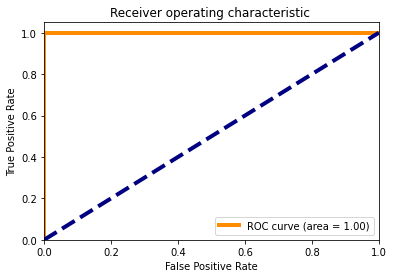

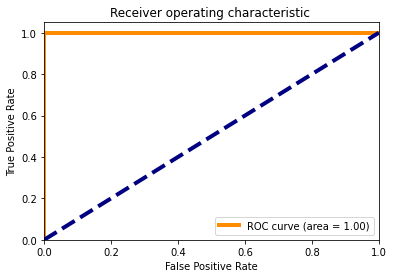

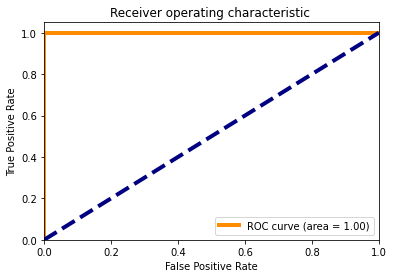

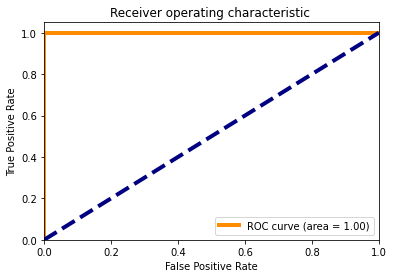

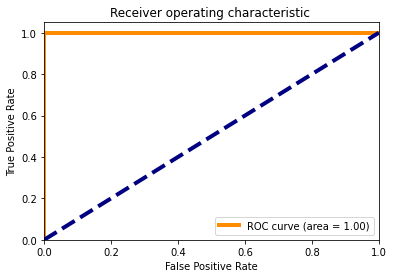

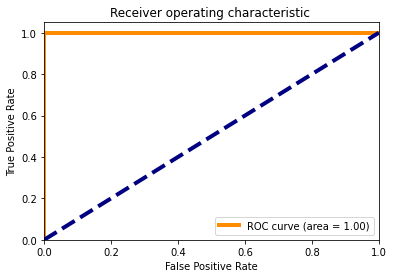

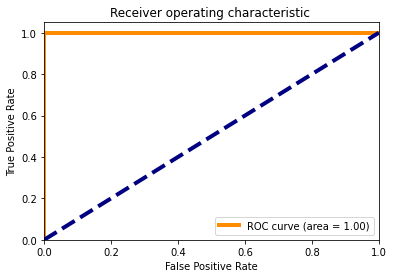

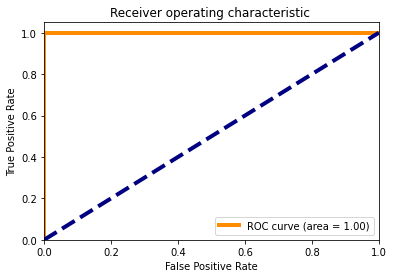

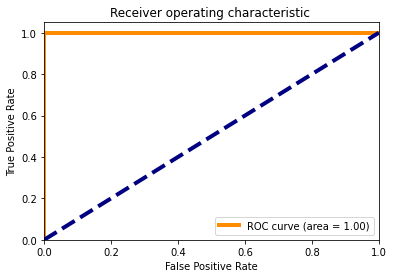

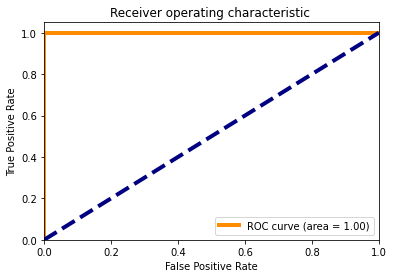

In [61]:
for j in range(J):
    pos_probs=Train[0][j]
    y_score=np.hstack(pos_probs)
    y_test=np.hstack(X_true)
    fpr, tpr, thresholds = roc_curve(y_test, y_score,pos_label=1)
    plt.figure()
    lw = 4
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic ")
    plt.legend(loc="lower right")
    plt.show()

In [54]:
Accuracy_(X_true,Train[0][1])

1.0